# Ссылки на презентацию:

**Google:** https://drive.google.com/file/d/1NxJhAcNpaKXZ68OwzTHwZK-xSYrDcfuL/view?usp=sharing

**Яндекс диск:** https://disk.yandex.ru/i/7S-o6ANq93uEKw

# Выпускной проект: Исследование отточных клиентов банка

# Описание проекта
**Заказчик:** Отдел маркетинга. Информация нужна менеджеру, который занимается маркетиновыми кампаниями и работает в тесной связке с менеджерами продуктов.

**Цель исследования:** Максимально эффективно выделить сегменты отточных клиентов, чтобы они были однородными, высокоотточными и покрывали максимум проблемных зон банка. Таким образом, маркетинговое воздействие на эти сегменты должно привести к уменьшению оттока клиентов.

**Потребность в проведении исследования:** В банке последнее время драматически повысился отток, это начинает становиться проблемой, которая угрожает существованию банка.

**Актуальность исследования:** Раньше проводилось исследование, но оно устарело и по нему сейчас не ясно, в чём сейчас заключается проблема и как её можно решать. Состав клиентов банка изменился и старые сегменты больше не подходят.


# Описание данных:
- userid — идентификатор пользователя,
- score — баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- equity — приблизительная оценка собственности клиента,
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — был ли клиент активен последнее время,
- est_salary — оценочная заработная плата клиента
- churn — уходит или нет

## Загрузка данных и подготовка к исследованию

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import plotly.express as px
from plotly import graph_objects as go
import plotly.express as px
import phik
from scipy.stats import chi2_contingency

In [3]:
#откроем файл с данными и изучим общую информацию
try: 
     df = pd.read_csv(r'C:\Users\Danila30\Downloads\GitHub\Финальный проект\bank_scrooge.csv', sep=',')
    
except:
     df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv', sep=',')

### Проверка структуры данных

In [4]:
display(df)
print(df.info())

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
None


In [5]:
# Приведение названий столбцов к единому стилю (все строчные)
df.columns = df.columns.str.lower()
df.rename(columns={'userid': 'user_id'}, inplace=True)
print(df.columns)

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')


Названия столбцов приведены к единому регистру. Обнаружены пропуски в столбце age 26 и в столбце balance 2295

In [6]:
# Посмотрим на уникальные значения данныхз столбцов и вернемся к ним позже!
unique_genders = df['gender'].unique()
print(unique_genders)

unique_cities = df['city'].unique()
print(unique_cities)

['Ж' 'М']
['Рыбинск' 'Ярославль' 'Ростов']


### Исследовать природу пропусков: случайные или закономерные.

**Принятие решений по заполнению пропусков (например, медианой, средним значением или предсказанием модели) или удалению.**



Удалим все строки с пропусками в столбце age, т.к. их мало и заменить возраст мы ни на что не можем! Столбец balance будем проверять дополнительно! 

In [7]:
# Настройка формата вывода для отображения с двумя знаками после запятой
pd.options.display.float_format = '{:.2f}'.format

# Создаем копию оригинального DataFrame чтобы не нагружать основную таблицу
df_copy = df.copy()

# Список столбцов для анализа
analysis_columns = ['age', 'balance', 'products', 'est_salary', 'score','equity']

# Создаем признак для каждого столбца с пропусками в копии DataFrame
for col in df_copy.columns:
    if df_copy[col].isnull().any():
        df_copy[f'{col}_missing'] = df_copy[col].isnull().astype(int)

# Анализируем зависимость пропусков по указанным столбцам в копии DataFrame
for col in analysis_columns:
    # Проверяем, существует ли столбец с пропусками
    if f'{col}_missing' in df_copy.columns:
        print(f"\nАнализ пропусков для: {col}_missing")
        
        # Сводная таблица для расчета средних и медианных значений по другим столбцам
        pivot_table = df_copy.pivot_table(
            values=[c for c in analysis_columns if c != col],
            index=f'{col}_missing',
            aggfunc=['mean', 'median']
        )
        
        # Плоские заголовки с указанием меры
        pivot_table.columns = [f'{stat}_{feature}' for stat, feature in pivot_table.columns]

        # Печатаем и отображаем таблицу
        display(pivot_table)



Анализ пропусков для: age_missing


,mean_balance,mean_equity,mean_est_salary,mean_products,mean_score,median_balance,median_equity,median_est_salary,median_products,median_score
age_missing,,,,,,,,,,
0,827245.59,2.63,147786.81,1.87,848.68,524295.33,3.00,119626.79,2.00,853.00
1,1250033.57,1.38,178585.20,1.35,855.15,417361.11,0.00,142598.86,1.00,888.50



Анализ пропусков для: balance_missing


,mean_age,mean_equity,mean_est_salary,mean_products,mean_score,median_age,median_equity,median_est_salary,median_products,median_score
balance_missing,,,,,,,,,,
0,42.92,3.40,124501.87,2.08,843.74,40.00,4.00,106222.20,2.00,840.00
1,42.09,0.05,226310.21,1.16,865.35,40.00,0.00,174160.68,1.00,903.00


**На основании представленного анализа пропусков в столбцах age и balance, можно сделать следующие выводы по заполнению пропусков.**

- Пропуски в столбце age:
mean_balance (средний баланс) для строк с заполненным возрастом (age_missing = 0) составляет 827 тыс., а для строк с пропусками в age этот показатель увеличивается до 1.25 млн.
Среднее количество продуктов (mean_products) для строк с пропусками в age ниже (1.35) по сравнению со строками без пропусков (1.87). Понятно что продукты должны быть челочисленны, но этот столбце необходим для наглядности! Средняя зарплата (mean_est_salary) и медианная зарплата также выше в строках с пропусками age.

**На мой взгляд пропуски в столбце age лучше удалить, т.к. их всего 26 (это незначительно отразится на выборке), заполнять возраст  медианой или средним значением просто неуместно**

- Пропуски в столбце balance:
Средний возраст (mean_age) для строк с заполненным балансом (balance_missing = 0) почти равен среднему возрасту для строк с пропусками.
Однако средняя зарплата (mean_est_salary) и медианная зарплата для строк с пропусками в balance заметно выше, чем для строк без пропусков (примерно 226 тыс. против 124 тыс.). Среднее количество продуктов (mean_products) у клиентов с пропусками в balance ниже. В mean_equity у balance с пропусками equity равен 0.05, а median_equity равна 0.

**Так как в mean_equity у balance с пропусками c равен 0.05, а median_equity равна 0. Заменим все пропуски в balance медианными значениями у клиентов equity которых = 0!**


In [8]:
# Удаление строк с пропусками в 'age' (их всего 26)
df = df.dropna(subset=['age'])

# Дополнительно реобразуем типы данных для 'score', 'age', 'products' в целочисленные для лучшей наглядности
df['score'] = df['score'].astype(np.int64)
df['age'] = df['age'].astype(np.int64)
df['products'] = df['products'].astype(np.int64)


Посмотрим на уникальные значения данных из столбца products

In [9]:
# непонятно откуда тут 0, посмотрим сколько уникальных значений по количеству в столбце products
unique_products = df['products'].unique()
print(unique_products)

[2 3 1 4 5 0]


In [10]:
# Подсчет количества каждого уникального значения в столбце 'products'
product_counts = df['products'].value_counts()
print(product_counts)

products
2    5119
1    3323
3    1038
4     474
5      19
0       1
Name: count, dtype: int64


In [11]:
# Получаем строки, где значение в 'products' равно 0
rows_with_product_zero = df[df['products'] == 0]

# Печатаем результат
print(rows_with_product_zero)

      user_id  score     city gender  age  equity  balance  products  \
8957   147837    962  Рыбинск      Ж   79       3      NaN         0   

      credit_card  last_activity  est_salary  churn  
8957            0              0    25063.96      1  


На мой взгляд лучше удалить эту строку, хотя возможно это просто ошибка при выгрузке данных!

In [12]:
# Удаляем строки, где значение в 'products' равно 0
df = df[df['products'] != 0]

In [13]:
display(df)
print(df.info())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0
9996,139170,894,Ярославль,М,46,0,NaN,1,1,0,196898.29,0
9997,115639,903,Ярославль,М,24,0,NaN,2,1,1,108905.09,0
9998,148700,777,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0


<class 'pandas.core.frame.DataFrame'>
Index: 9973 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9973 non-null   int64  
 1   score          9973 non-null   int64  
 2   city           9973 non-null   object 
 3   gender         9973 non-null   object 
 4   age            9973 non-null   int64  
 5   equity         9973 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9973 non-null   int64  
 8   credit_card    9973 non-null   int64  
 9   last_activity  9973 non-null   int64  
 10  est_salary     9973 non-null   float64
 11  churn          9973 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1012.9+ KB
None


### Дубликаты

Посмотрим явные и неявные дубликаты

In [14]:
# Проверка на явные дубликаты
duplicates = df[df.duplicated(keep=False)]  # keep=False для получения всех дубликатов

# Количество явных дубликатов
duplicate_count = duplicates.shape[0]
print(f"\nКоличество явных дубликатов: {duplicate_count}")


Количество явных дубликатов: 0


In [15]:
  # Проверка на неявные дубликаты по 'user_id'
duplicates = df[df.duplicated(subset='user_id', keep=False)]
pd.set_option('display.max_rows', 100)

  # Выводим информацию о неявных дубликатах
print(f"Количество неявных дубликатов: {len(duplicates)}")

  # Уникальное количество дублирующихся user_id
unique_duplicate_count = duplicates['user_id'].nunique()
print(f"Количество уникальных дубликатов: {unique_duplicate_count}")

display(duplicates)

Количество неявных дубликатов: 100
Количество уникальных дубликатов: 50


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
58,164676,860,Ярославль,М,37,5,648594.03,2,1,1,213586.86,1
150,185748,850,Рыбинск,М,36,5,1203376.67,2,0,1,89401.82,1
161,197364,928,Рыбинск,Ж,53,6,1347183.86,2,0,1,168189.49,1
231,190253,823,Рыбинск,М,37,4,373348.39,2,0,1,131947.92,1
690,152479,768,Рыбинск,Ж,42,0,126787.79,4,1,1,143233.23,1
790,170312,901,Ярославль,М,33,4,3276783.93,3,0,1,358700.96,1
869,210662,962,Ярославль,Ж,54,5,5069231.39,1,1,1,955144.85,1
904,131419,934,Ярославль,М,35,5,2348335.95,2,0,0,217105.13,1
946,149365,877,Ярославль,М,41,5,819182.01,2,0,0,212316.47,1
1080,155872,896,Ярославль,М,36,3,1113656.92,3,0,1,291176.85,1


In [16]:
df = df.drop_duplicates(subset='user_id', keep='first')
display(df)
display(df.info())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0
9996,139170,894,Ярославль,М,46,0,NaN,1,1,0,196898.29,0
9997,115639,903,Ярославль,М,24,0,NaN,2,1,1,108905.09,0
9998,148700,777,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0


<class 'pandas.core.frame.DataFrame'>
Index: 9923 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9923 non-null   int64  
 1   score          9923 non-null   int64  
 2   city           9923 non-null   object 
 3   gender         9923 non-null   object 
 4   age            9923 non-null   int64  
 5   equity         9923 non-null   int64  
 6   balance        7664 non-null   float64
 7   products       9923 non-null   int64  
 8   credit_card    9923 non-null   int64  
 9   last_activity  9923 non-null   int64  
 10  est_salary     9923 non-null   float64
 11  churn          9923 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1007.8+ KB


None

### Кодирование категориальных переменных:
Используем метод get_dummies() one-hot кодирования и создадим бинарные столбцы для city и gender

In [17]:
# Создаем копии столбцов перед кодированием
df['original_city'] = df['city']
df['original_gender'] = df['gender']

# Применяем one-hot кодирование к столбцам 'city' и 'gender' с сохранением префиксов
df = pd.get_dummies(df, columns=['city', 'gender'], prefix=['city', 'gender'], drop_first=False)

# Преобразуем данные в столбцах с one-hot кодированием в 0 и 1
df = df.astype({col: int for col in df.columns if 'city_' in col or 'gender_' in col})

# Проверяем результат
display(df.head())
display(df.info())



,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,original_city,original_gender,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,183012,850,25,1,59214.82,2,0,1,75719.14,1,Рыбинск,Ж,0,1,0,1,0
1,146556,861,37,5,850594.33,3,1,0,86621.77,0,Рыбинск,Ж,0,1,0,1,0
2,120722,892,30,0,NaN,1,1,1,107683.34,0,Рыбинск,Ж,0,1,0,1,0
3,225363,866,51,5,1524746.26,2,0,1,174423.53,1,Ярославль,Ж,0,0,1,1,0
4,157978,730,34,5,174.00,1,1,0,67353.16,1,Ярославль,М,0,0,1,0,1


<class 'pandas.core.frame.DataFrame'>
Index: 9923 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          9923 non-null   int64  
 1   score            9923 non-null   int64  
 2   age              9923 non-null   int64  
 3   equity           9923 non-null   int64  
 4   balance          7664 non-null   float64
 5   products         9923 non-null   int64  
 6   credit_card      9923 non-null   int64  
 7   last_activity    9923 non-null   int64  
 8   est_salary       9923 non-null   float64
 9   churn            9923 non-null   int64  
 10  original_city    9923 non-null   object 
 11  original_gender  9923 non-null   object 
 12  city_Ростов      9923 non-null   int32  
 13  city_Рыбинск     9923 non-null   int32  
 14  city_Ярославль   9923 non-null   int32  
 15  gender_Ж         9923 non-null   int32  
 16  gender_М         9923 non-null   int32  
dtypes: float64(2), int3

None

**Итог:**

- Привели названия столбцов к единому стилю.
- Нашли пропуски. Удалили все строки с пропусками в столбце age, пропуски в balance оставили как есть (на ход исследование они никак не повлияют).
- Удалили неявные(неуникальные значения) в столбце user_id.
- Применили метод get_dummies() one-hot кодирования к столбцам city и gender

## Исследовательский анализ данных (EDA)
### Анализ основных статистик по каждому признаку:
- Рассчитать средние, медианы и моду для всех признаков.
- Сравнить средние, медианы и моду для отточных и неотточных клиентов.



In [18]:
# 1. Группировка данных по `churn` и расчет средних, медиан и мод с учетом `churn`
mean_median_df = df.groupby('churn').agg({
    'score': ['mean', 'median'],
    'balance': ['mean', 'median'],
    'est_salary': ['mean', 'median'],
    'equity': 'median',
    'products': 'median',
    'credit_card': 'median',
    'last_activity': 'median',
    'age': 'median',
    'original_gender': lambda x: x.mode()[0],  # Мода
    'original_city': lambda x: x.mode()[0]     # Мода
})

# Переименуем колонки для удобства
mean_median_df.columns = [
    'среднее_балов_скоринга', 'медиана_балов_скоринга',
    'среднее_баланса', 'медиана_баланса',
    'среднее_зарплаты', 'медиана_зарплаты',
    'медиана_оценки_собственности', 'медиана_продуктов',
    'медиана_кредитной_карты', 'медиана_последней_актинвости', 'медиана_возраста',
    'мода_полового_признака', 'мода_города_клиента'
]

# Транспонируем таблицу, чтобы churn стал столбцом, а остальные метрики строками
mean_median_df = mean_median_df.T
mean_median_df.columns = ['остаются', 'уходят']

# Сбрасываем индекс, чтобы преобразовать индексы в столбец для удобства
mean_median_df.reset_index(inplace=True)
mean_median_df.rename(columns={'index': 'метрика'}, inplace=True)

# 5. Создаем вторую таблицу для расчета относительной разницы по признаку churn
churn_group = df.groupby('churn')[['score', 'balance', 'est_salary']].mean()
relative_diff_df = pd.DataFrame({
    'метрика': ['балы_кредитного_скоринга', 'баланс_клиента', 'зарплата_клиента'],
    'относителная_разница': [
        (churn_group.loc[1, 'score'] - churn_group.loc[0, 'score']) / churn_group.loc[1, 'score'] * 100,
        (churn_group.loc[1, 'balance'] - churn_group.loc[0, 'balance']) / churn_group.loc[1, 'balance'] * 100,
        (churn_group.loc[1, 'est_salary'] - churn_group.loc[0, 'est_salary']) / churn_group.loc[1, 'est_salary'] * 100
    ]
})

# Вывод таблиц
print("Таблица со средними, медианами, модами и учетом лояльности")
display(mean_median_df)

print("\nТаблица с относительной разницей для непрерывных показателей с учетом лояльности по средним значениям:")
display(relative_diff_df)



Таблица со средними, медианами, модами и учетом лояльности


,метрика,остаются,уходят
0,среднее_балов_скоринга,845.44,863.36
1,медиана_балов_скоринга,848.00,866.00
2,среднее_баланса,733789.92,1134458.21
3,медиана_баланса,475382.45,783908.90
4,среднее_зарплаты,147788.27,148357.48
5,медиана_зарплаты,118247.25,125408.88
6,медиана_оценки_собственности,3.00,4.00
7,медиана_продуктов,2.00,2.00
8,медиана_кредитной_карты,1.00,1.00
9,медиана_последней_актинвости,0.00,1.00



Таблица с относительной разницей для непрерывных показателей с учетом лояльности по средним значениям:


,метрика,относителная_разница
0,балы_кредитного_скоринга,2.08
1,баланс_клиента,35.32
2,зарплата_клиента,0.38


Лояльные клиенты - те кто остаются, нелояльные, те - которые собираются уйти

**В таблице 1 наблюдаем:**
* Медиана баллов кредитного скоринга (score) выше на 18 баллов у нелояльных клиентов равняется 866, у лояльных 848 !
* Медиана баланса на счёте (balance) почти в 2 раза больше и выше на 308 т.р. у нелояльных клиентов!
* Медиана оценочной заработной платы клиента (est_salary) выше на 7 т.р. у нелояльных клиентов !
* Медиана приблизительной оценки собственности капитала (equity) на 1 больше у нелояльных клиентов она равен 4, у лояльных 3!
* Медианы количество продуктов, которыми пользуется клиент (products) - у лояльных и нелояльных клиентов равны!
* Медианы наличия кредитной карты (credit_card) - у лояльных и нелояльных клиентов равны!
* Медиана активности клиента за последнее время (last_activity) - больше  у нелояльных клиентов!
* Медиана возраста у лояльных клиентов 40 лет, у нелояльных 39 лет практически равны!
* В моде по половому признаку (original_gender) - более лояльны женщины, менее лояльны мужчины!
* В моде по месту проживания преобладает город Ярославль - в нём проживает больше всего лояльных и нелояльных клиентов - скорее всего это связано из-за количества данных между городами!

**В таблице 2 наблюдаем:**
* Относительная разница баллов кредитного скоринга (relative_diff_score)  2.08% в пользу лояльных клиентов!
* Относительная разница баланса на счёте (relative_diff_balance) 35.32% в пользу лояльных клиентов!
* Относительная разница оценочная заработная плата клиента (relative_diff_est_salary) 0.38% в пользу лояльных клиентов!

Таким образом, основная тенденция которую можно отследить без графиков - это то что баланс нелояльных клиентов превышает баланс лояльных клиентов на 53.03%, если рассматривать среднии значения!

### Анализ распределений непрерывных переменных:
- Построить распределения для «balance», «est_salary» , «score», «age».
- Сравнить распределения в разрезе оттока.

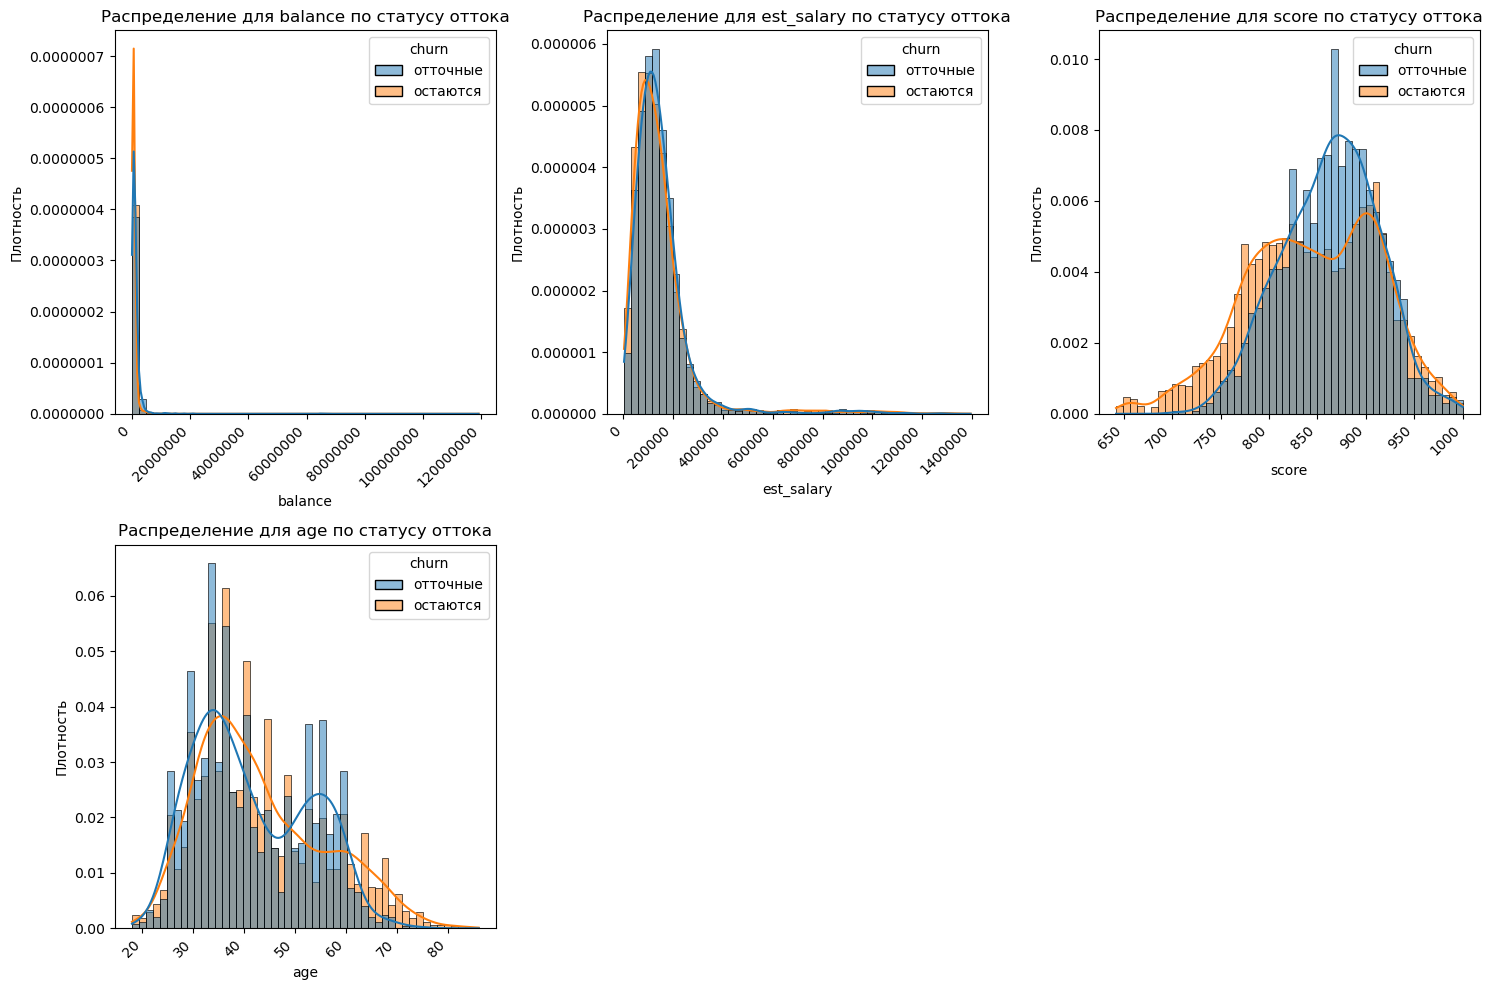

In [19]:
# Определяем непрерывные переменные для анализа
continuous_vars = ['balance', 'est_salary', 'score', 'age']

# Настройка размера графиков
plt.figure(figsize=(15, 10))

for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    
    # Строим график с разделением по переменной churn с текстовой легендой и без общей нормализации
    sns.histplot(data=df.replace({'churn': {0: 'остаются', 1: 'отточные'}}), 
                 x=var, hue='churn', kde=True, stat="density", bins=50, alpha=0.5,common_norm=False)
    plt.title(f'Распределение для {var} по статусу оттока')
    
    # Убираем экспоненциальную запись чисел на осях
    plt.ticklabel_format(style='plain', axis='x')  # Для оси X
    plt.ticklabel_format(style='plain', axis='y')  # Для оси Y
    
    # Поворачиваем подписи на оси X под углом 45 градусов и выравниваем их
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Плотность')
plt.tight_layout()
plt.show()

Теперь есть примерная картина по распределению уровня оттока в каждой категории! **Рассмотрим графики более подробно!**

**Распределния оттока клиентов по score**

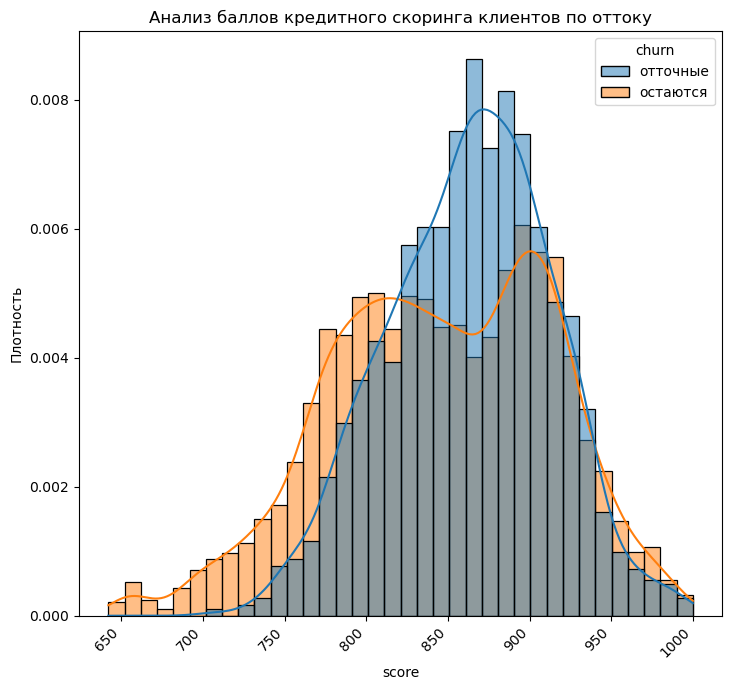

In [20]:
plt.figure(figsize=(14, 7))

# Анализ распределения заработной платы по статусу оттока
plt.subplot(1, 2, 2)
sns.histplot(data=df.replace({'churn': {0: 'остаются', 1: 'отточные'}}), 
             x='score', hue='churn', kde=True, stat="density", bins=36, alpha=0.5,common_norm=False)
plt.title('Анализ баллов кредитного скоринга клиентов по оттоку')
plt.xlabel('score')
plt.ylabel('Плотность')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

- В баллах кредитного скоринга большая отточная группа клиентов сосредоточена в диапазоне 820-910 и маленькая в соседнем диапазоне 930-940 их можно объединить в 1 большую 820-940

**Распределния оттока клиентов по age**

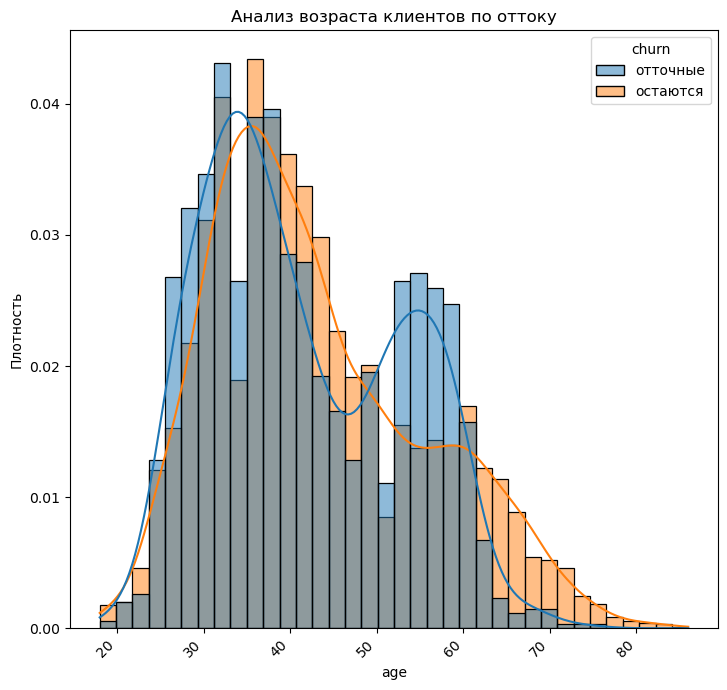

In [21]:
plt.figure(figsize=(14, 7))

# Анализ распределения заработной платы по статусу оттока
plt.subplot(1, 2, 2)
sns.histplot(data=df.replace({'churn': {0: 'остаются', 1: 'отточные'}}), 
             x='age', hue='churn', kde=True, stat="density", bins=36, alpha=0.5,common_norm=False)
plt.title('Анализ возраста клиентов по оттоку')
plt.xlabel('age')
plt.ylabel('Плотность')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

- В возрасте клиентов прослеживается 2 большие отточные группы в диапазоне 26-34 лет и 50-60 лет.

**Распределния оттока клиентов по balance**

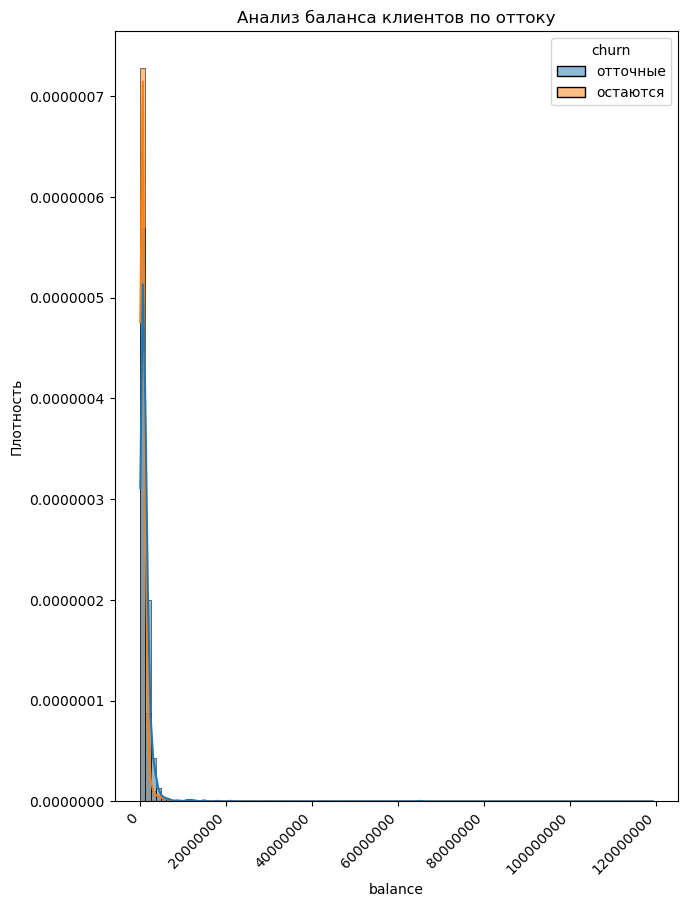

In [22]:
# Дополнительный график для более детального анализа баланса
plt.figure(figsize=(16, 10))

# Анализ распределения баланса по статусу оттока
plt.subplot(1, 2, 1)
sns.histplot(data=df.replace({'churn': {0: 'остаются', 1: 'отточные'}}), 
             x='balance', hue='churn', kde=True, stat="density", bins=100, alpha=0.5, common_norm=False)

# Подписи и оформление
plt.title('Анализ баланса клиентов по оттоку')
plt.xlabel('balance')
plt.ylabel('Плотность')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.show()


Не совсем понятно какой диапазон необходимо учитывать при дальнейшем анализе. Но явно отточные клиенты преобладают в выборке с высоким балансом создадим копию таблицы и уберем из неё клиентов с балансом ниже 10 млн. р.

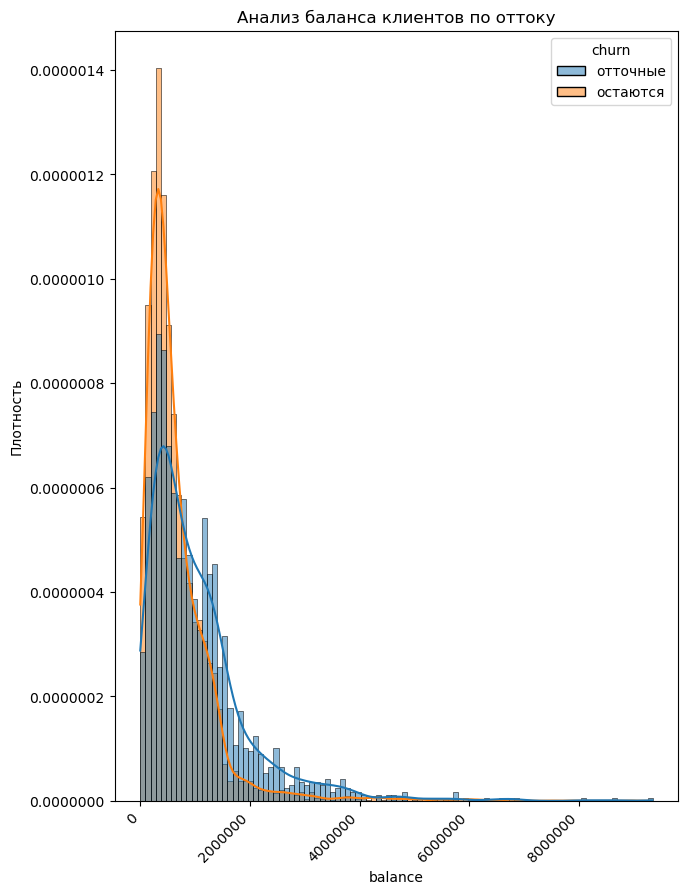

In [23]:
# Создаём копию DataFrame с фильтрацией баланса
df_filtered = df[df['balance'] <= 10000000]

# Строим график на основе отфильтрованного DataFrame
plt.figure(figsize=(16, 10))

# Анализ распределения баланса по статусу оттока
plt.subplot(1, 2, 1)
sns.histplot(data=df_filtered.replace({'churn': {0: 'остаются', 1: 'отточные'}}), 
             x='balance', hue='churn', kde=True, stat="density", bins=100, alpha=0.5, common_norm=False)

# Подписи и оформление
plt.title('Анализ баланса клиентов по оттоку')
plt.xlabel('balance')
plt.ylabel('Плотность')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Рассмотрим выборку еще подробнее исключив все значения баланса выше 7 млн.р.

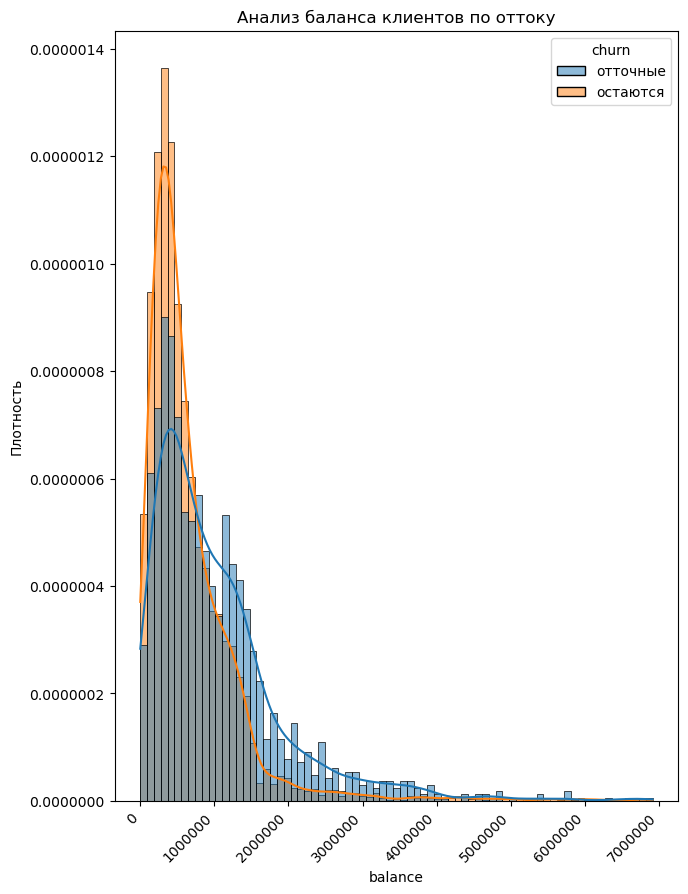

In [24]:
# Создаём копию DataFrame с фильтрацией баланса
df_filtered = df[df['balance'] <= 7000000]

# Строим график на основе отфильтрованного DataFrame
plt.figure(figsize=(16, 10))

# Анализ распределения баланса по статусу оттока
plt.subplot(1, 2, 1)
sns.histplot(data=df_filtered.replace({'churn': {0: 'остаются', 1: 'отточные'}}), 
             x='balance', hue='churn', kde=True, stat="density", bins=75, alpha=0.5, common_norm=False)

# Подписи и оформление
plt.title('Анализ баланса клиентов по оттоку')
plt.xlabel('balance')
plt.ylabel('Плотность')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

- В основную группу отточных входят клиенты с балансом свыше 750 т.р. Очень большое количество действующих клиентов имеют баланс ниже 750 т.р.

**Распределния оттока клиентов по заработной плате**

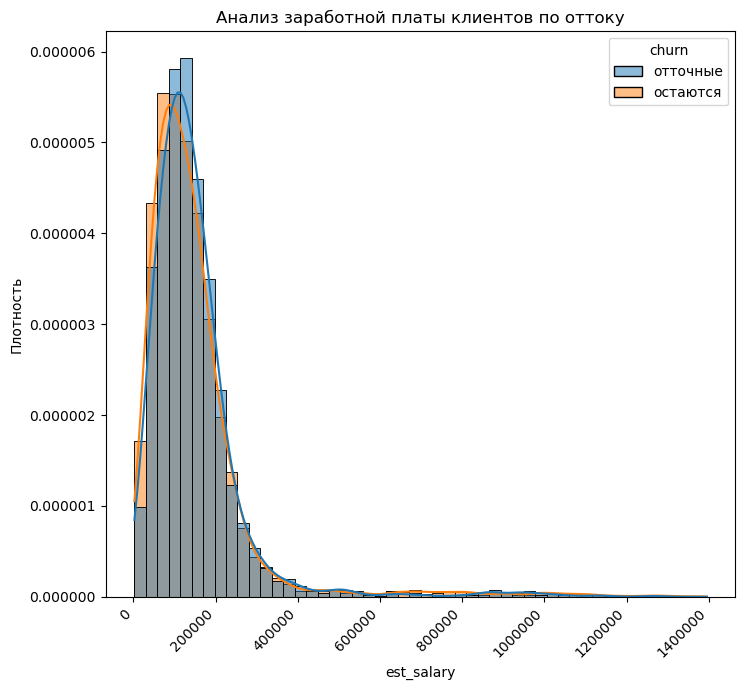

In [25]:
# Дополнительный график для более детального анализа зарплаты
plt.figure(figsize=(14, 7))

# Анализ распределения заработной платы по статусу оттока
plt.subplot(1, 2, 2)
sns.histplot(data=df.replace({'churn': {0: 'остаются', 1: 'отточные'}}), 
             x='est_salary', hue='churn', kde=True, stat="density", bins=50, alpha=0.5,common_norm=False)
plt.title('Анализ заработной платы клиентов по оттоку')
plt.xlabel('est_salary')
plt.ylabel('Плотность')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

- Основной уровень оттока по приблизительным зарплатам клиентов наблюдается в диапазоне 115-225 т.р. Уровень оттока немного меньше прослеживается в диапазоне 275-500 т.р. возьмём его на заметку, но как основной будем рассматривать 115-225 т.р. Во время сегментации есть смысл объединить всех отточных в группы с зарплатой больше 115 т.р.

### Уровни оттока по категориям (расчет долей оттока):

#### Уровень оттока по категориям для переменных: «gender», «city» «equity», «products», «credit_card», «last_activity»

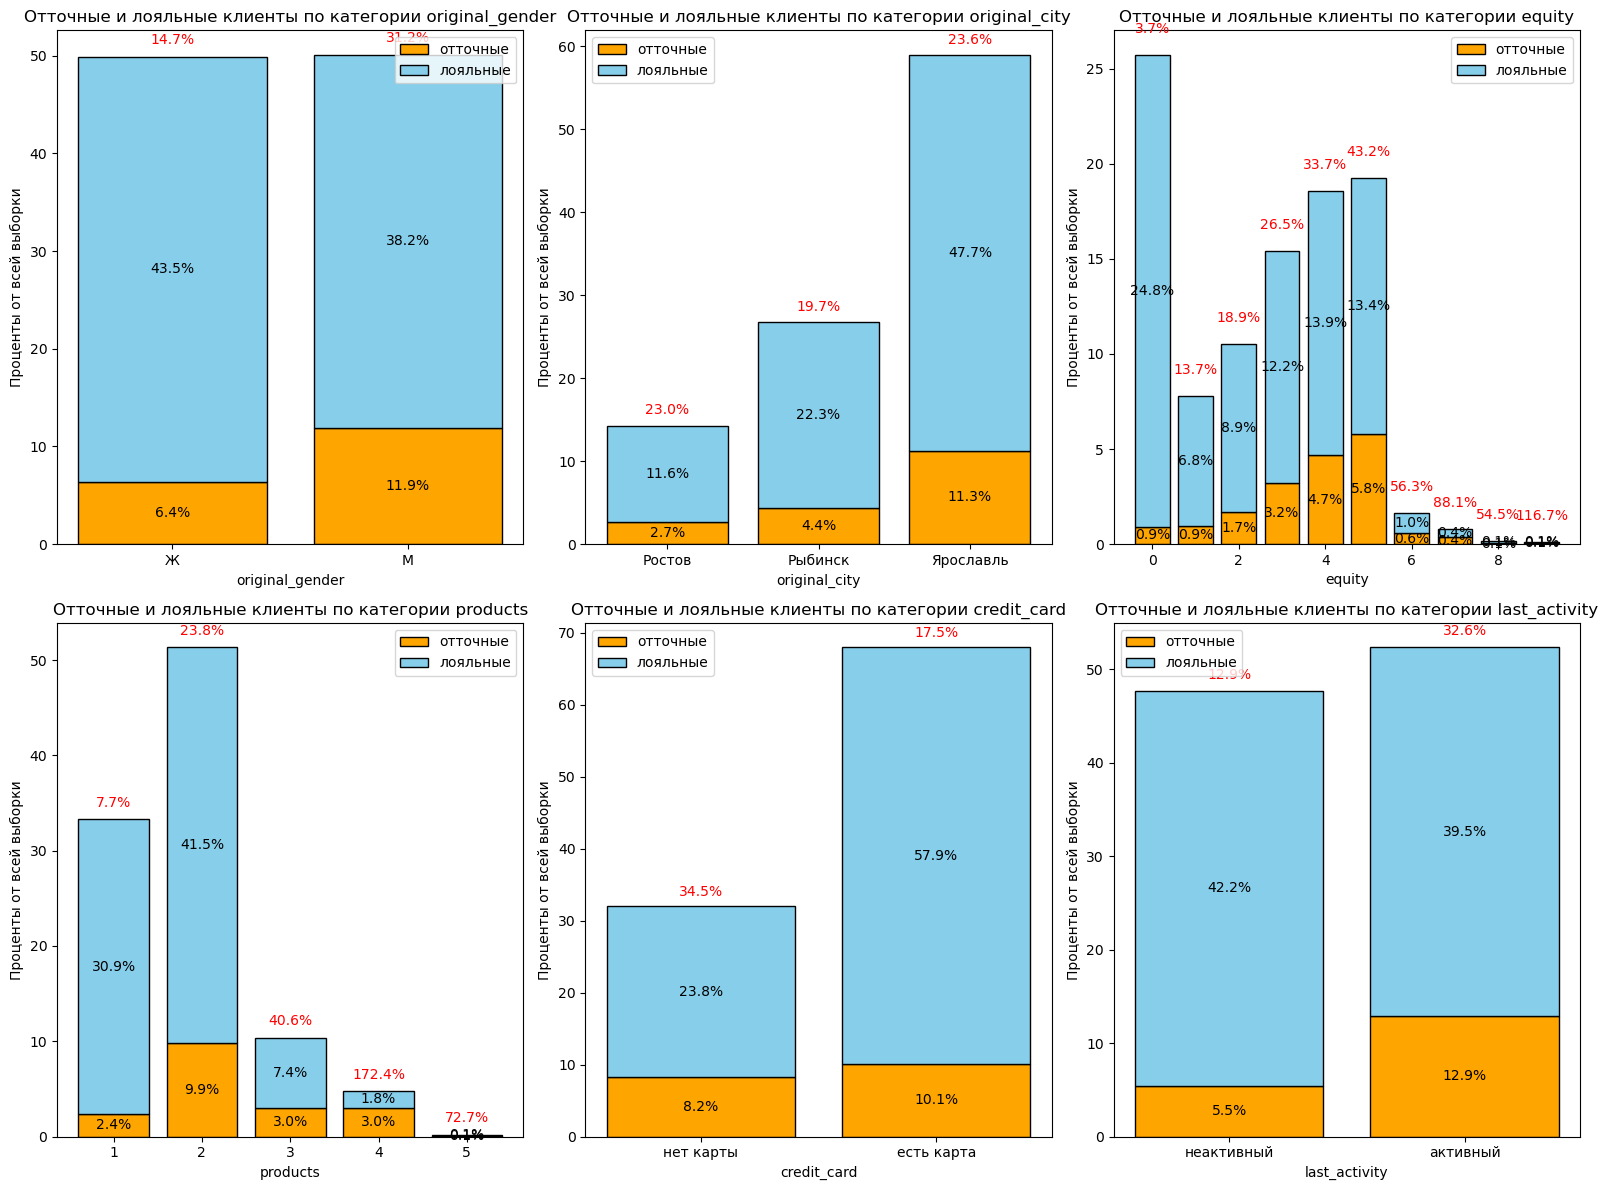

In [26]:
# Список категориальных переменных
categorical_vars = ['original_gender', 'original_city', 'equity', 'products', 'credit_card', 'last_activity']

# Создаем подграфики по каждому категориальному признаку
plt.figure(figsize=(16, 12))

for idx, var in enumerate(categorical_vars, 1):
    # Подсчет общего количества клиентов в каждой категории
    total_counts = df[var].value_counts()  # Общее количество клиентов по категориям

    # Подсчет количества отточных и лояльных клиентов в каждой категории
    churn_counts = df[df['churn'] == 1][var].value_counts()  # Отточные клиенты
    loyal_counts = df[df['churn'] == 0][var].value_counts()  # Лояльные клиенты
    
    # Рассчитываем долю отточных и лояльных клиентов внутри каждой категории
    churn_percent = churn_counts / total_counts * 100  # Процент отточных клиентов
    loyal_percent = loyal_counts / total_counts * 100  # Процент лояльных клиентов
    
    # Рассчитываем процент от всей выборки для каждой категории
    churn_total_percent = churn_counts / df.shape[0] * 100  # Процент от всей выборки
    loyal_total_percent = loyal_counts / df.shape[0] * 100  # Процент от всей выборки

    # Сортировка значений для корректного отображения
    churn_total_percent = churn_total_percent.sort_index()
    loyal_total_percent = loyal_total_percent.sort_index()

    # Проверка для отображения текстовых меток для бинарных данных
    if var == 'credit_card':
        churn_total_percent.index = churn_total_percent.index.map({1: 'есть карта', 0: 'нет карты'})
        loyal_total_percent.index = loyal_total_percent.index.map({1: 'есть карта', 0: 'нет карты'})
    elif var == 'last_activity':
        churn_total_percent.index = churn_total_percent.index.map({1: 'активный', 0: 'неактивный'})
        loyal_total_percent.index = loyal_total_percent.index.map({1: 'активный', 0: 'неактивный'})
    
    # Создаем подграфик
    plt.subplot(2, 3, idx)
    
    # Строим "stacked bar chart" для отточных и лояльных клиентов
    bars1 = plt.bar(churn_total_percent.index, churn_total_percent, color='orange', edgecolor='black', label='отточные')  # Нижняя часть
    bars2 = plt.bar(loyal_total_percent.index, loyal_total_percent, bottom=churn_total_percent, color='skyblue', edgecolor='black', label='лояльные')  # Верхняя часть
    
    # Настройки для графика
    plt.title(f"Отточные и лояльные клиенты по категории {var}")
    plt.xlabel(var)
    plt.ylabel('Проценты от всей выборки')
    
    # Специальное выравнивание для бинарных категорий
    if var in ['credit_card', 'last_activity']:
        plt.xticks(ticks=range(len(churn_total_percent.index)), labels=churn_total_percent.index, rotation=0, ha='center')
    else:
        plt.xticks(rotation=0, ha='center')
    
    # Добавляем значения на графики и рассчитываем отношение отточных к лояльным для каждой подкатегории
    for i, (bar_churn, bar_loyal) in enumerate(zip(bars1, bars2)):
        # Подпись для доли отточных клиентов (внизу)
        plt.text(bar_churn.get_x() + bar_churn.get_width() / 2, bar_churn.get_height() / 2, f'{bar_churn.get_height():.1f}%', ha='center', va='center', color='black')
        # Подпись для доли лояльных клиентов (сверху)
        plt.text(bar_loyal.get_x() + bar_loyal.get_width() / 2, bar_churn.get_height() + bar_loyal.get_height() / 2, f'{bar_loyal.get_height():.1f}%', ha='center', va='center', color='black')

        # Рассчитываем процент отточных к лояльным для каждой подкатегории
        churn_value = bar_churn.get_height()
        loyal_value = bar_loyal.get_height()
        if loyal_value > 0:  # Чтобы избежать деления на 0
            ratio = (churn_value / loyal_value) * 100
            # Добавляем текст с процентом отношения отточных к лояльным
            plt.text(bar_loyal.get_x() + bar_loyal.get_width() / 2, bar_churn.get_height() + bar_loyal.get_height() + 1, f'{ratio:.1f}%', ha='center', va='bottom', color='red')

    # Добавляем легенду
    plt.legend()

plt.tight_layout()
plt.show()


*По оси Y у нас общий процент содежрания подкатегории в стоблце(параметре). Синим цветом отмечены лояльные клиенты, оранжевым отточные и сверху красные % отображают процентное содержание оттока к объему, что позволяет лучше понять, как отточные клиенты распределяются в контексте лояльных клиентов в разных категориях:*

- Мужчин и женщин среди всех клиентов банка поровну, однако отточных мужчин - 11.9%, а женщин почти в  2 раза меньше - 6.4% и. Процент содержания оттока к объёму лучше у мужчин 31.1% их лучше всего использовать в сегментации!
- 58.9% клиентов банка проживают в городе Ярославль  в Рыбинске и Ростове остальные 41.1%. Процент содержания оттока к объёму практически у всех одинаковый, лучше всех в Ярославле 23.5%, но в сегментации можно будет использовать все города сразу!
- В приблизительной оценке собственности клиента можно выделить сразу целую группу клиентов и рассмотреть её в сегментации клиенты с 3-9 или 4-9 балами. Данные группы включают в себя большую часть клиентов и имеют большие доли оттока! Отдельно еще хочется обратить внимание на клиентов с 0 балами
- В количестве продуктов, которыми пользуется клиент саммая большая группа клиентов с 2 продуктами, но отток в ней 23.6%. Поэтому во время построянеия сегментации отточных клиентов можно использовать группу клиентов только с 2 продуктами, либо с 2-5 продуктами!
- Клиентов банка с картой почти 70%. Однако болле отточно ведут себя клиенты без карты!
- Активных и неактивных клиентов банка практически поровну, однако автивные клиенты более отточны! 

#### Доли оттока среди клиентов, которые уходят по всей выборке

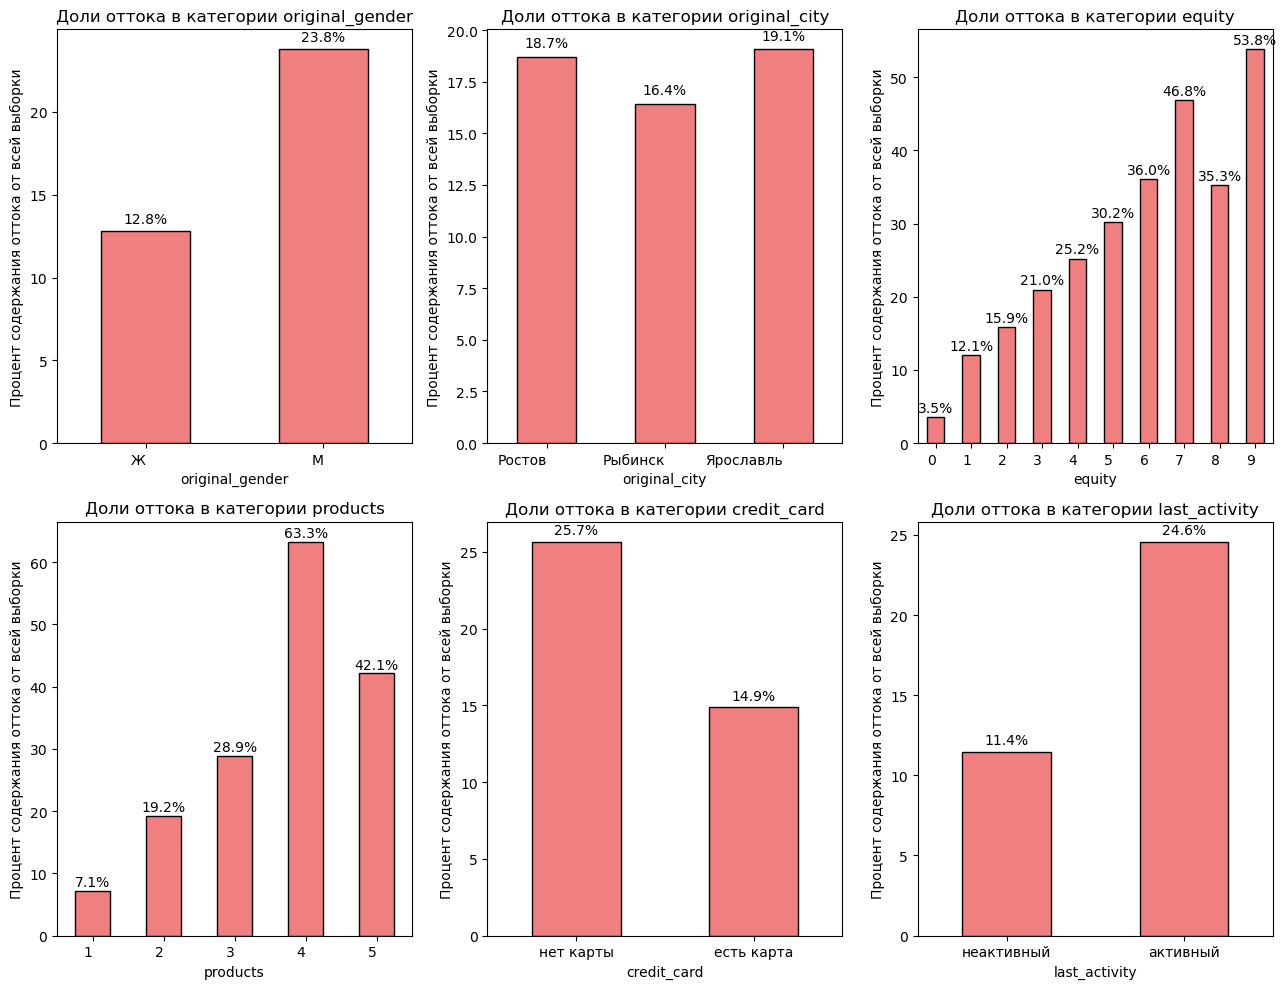

In [27]:
# Список категориальных переменных
categorical_vars = ['original_gender', 'original_city', 'equity', 'products', 'credit_card', 'last_activity']

# Фильтрация данных по churn = 1 (оставляем только тех, кто ушел)
df_churn = df[df['churn'] == 1]

# Создаем подгруппы по каждому категориальному признаку
plt.figure(figsize=(13, 10))

for idx, var in enumerate(categorical_vars, 1):
    # Считаем общее количество записей в каждой категории
    total_counts = df[var].value_counts()  # Общее количество в каждой категории
    # Считаем количество значений churn=1 в каждой категории
    churn_counts = df_churn[var].value_counts()
    
    # Вычисляем процентное содержание churn=1 от общего количества
    churn_percentage_of_total = (churn_counts / total_counts) * 100
    churn_percentage_of_total = churn_percentage_of_total.sort_index()  # Сортируем индексы для правильного отображения на графике
    
    # Создаем подграфик
    plt.subplot(2, 3, idx)
    ax = churn_percentage_of_total.plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.title(f"Доли оттока в категории {var}")
    plt.xlabel(var)
    plt.ylabel('Процент содержания оттока от всей выборки')
    plt.xticks(rotation=0, ha='right')
    
    # Настроим подписи для переменных с бинарными значениями
    if var == 'credit_card':
        labels = ["нет карты" if label == 0 else "есть карта" for label in churn_percentage_of_total.index]
        ax.set_xticklabels(labels, ha='center')
    elif var == 'last_activity':
        labels = ["неактивный" if label == 0 else "активный" for label in churn_percentage_of_total.index]
        ax.set_xticklabels(labels, ha='center')
    
    # Отображаем значения на графике
    for i, value in enumerate(churn_percentage_of_total):
        if not pd.isna(value):  # Проверяем, что значение не NaN
            plt.text(i, value + 0.3, f'{value:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Доли оттока по категориям среди всех клиентов (как лояльных, так и нелояльных):

* По половому признаку отточных клиентов среди мужчин больше - 23.7%, а женщин 12.7% !
* По географическому положению (городам) примерно одинаковое количество отточных клиентов - Ярославль 19%, Ростов 18.7% и Рыбинск 16.3% !
* По приблизительной оценки собственности клиента больше всего с балом 9 - 53.8%, 7 балов - 46.2%, 8 балов - 35.3% !
* По количеству продуктов, которыми пользуется клиент больше всего оттока у клиентов с 4 продуктами - 63.3%, далее идут клиенты с 5 продуктами - 42.1% и с 3 продуктами - 28.6% !
* У клиентов без кредитной карты доля оттока равна 25.6%, у клиента без кредитной карты 14.8% !
* Активные клиенты имеют долю 24.5%, неактивные 11.4% ! 

### Корреляционный анализ:

#### Корреляцию для непрерывных признаков

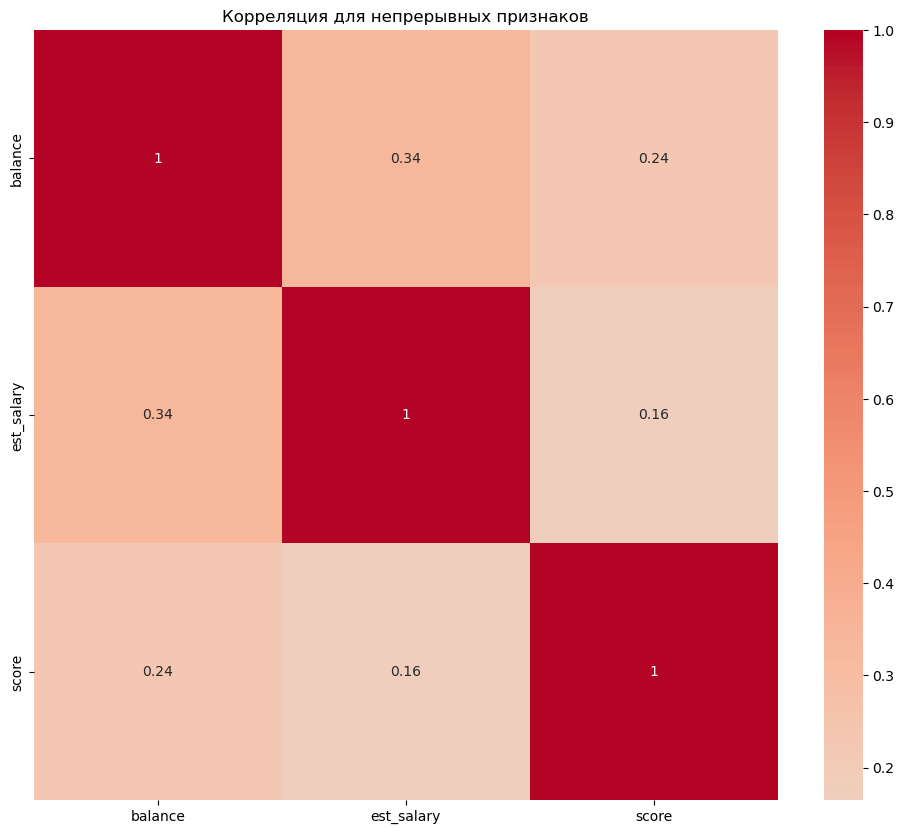

In [28]:
# 2.4.1 Корреляционный анализ
# Корреляция для непрерывных признаков
continuous_vars = ['balance', 'est_salary', 'score']
correlation_matrix = df[continuous_vars].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляция для непрерывных признаков')
plt.show()


В непрервыных переменных у balance и est_salary корреляция 0.2. У balance и score 0.16, у est_salary и score 0.16 !

#### Корреляция для категориальных переменных с использованием Cramér's V

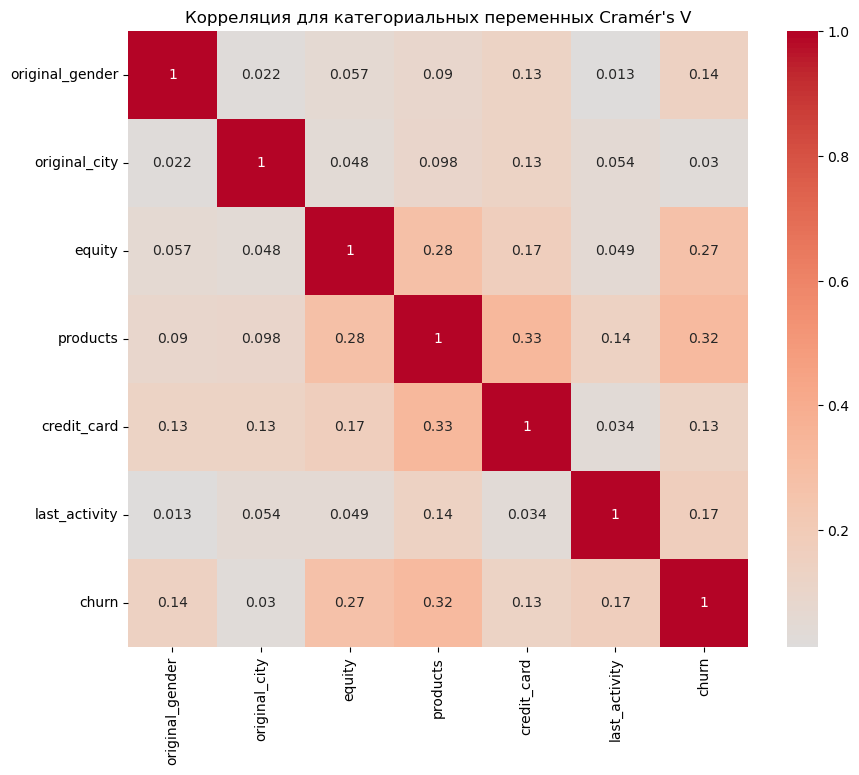

In [29]:
corr_vars_categoty = ['original_gender', 'original_city', 'equity', 'products', 'credit_card', 'last_activity', 'churn']
# Функция для Cramér's V
def cramers_v(x, y):
    chi2 = chi2_contingency(pd.crosstab(x, y))[0]
    return np.sqrt(chi2 / (len(x) * (min(pd.crosstab(x, y).shape) - 1)))

# Матрица Cramér's V для категориальных переменных
cramers_v_matrix = pd.DataFrame(
    [[cramers_v(df[x], df[y]) if x != y else 1 for y in corr_vars_categoty] for x in corr_vars_categoty], 
    index=corr_vars_categoty, columns=corr_vars_categoty
)

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Корреляция для категориальных переменных Cramér's V")
plt.show()


У категорийных переменных больше всего корреляция у credit_card и products - 0.33, и у products и churn - 0.32 !

#### Визуализация корреляции с помощью heatmap для каждого типа признаков

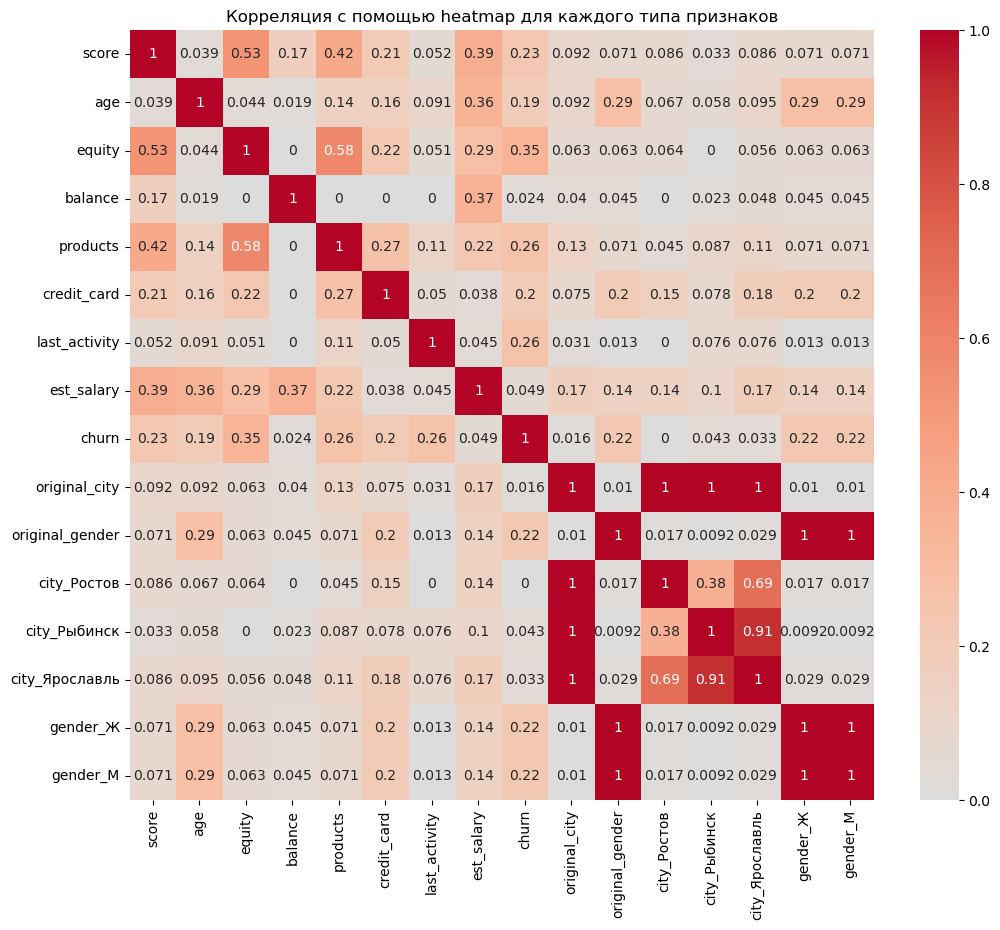

Корреляция с оттоком (churn), превышающая 10% по модулю:
equity: 0.35 (Умеренная связь)
last_activity: 0.26 (Слабая связь)
products: 0.26 (Слабая связь)
score: 0.23 (Слабая связь)
original_gender: 0.22 (Слабая связь)
gender_Ж: 0.22 (Слабая связь)
gender_М: 0.22 (Слабая связь)
credit_card: 0.20 (Слабая связь)
age: 0.19 (Слабая связь)


In [30]:
# Исключаем указанные столбцы из DataFrame
excluded_columns = ['user_id']
df_filtered = df.drop(columns=excluded_columns)

# Считываем список категориальных и непрерывных переменных
continuous_vars = df_filtered.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_vars = df_filtered.select_dtypes(include=['object']).columns.tolist()

# Пересчет корреляции с phik
phik_matrix = df_filtered.phik_matrix(interval_cols=continuous_vars)

# Визуализация матрицы корреляций
plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляция с помощью heatmap для каждого типа признаков')
plt.show()

# Оценка корреляции с оттоком (churn)
correlations_with_churn = phik_matrix['churn'].sort_values(ascending=False).abs()

# Оставляем только те, у которых корреляция больше 0.1 (10%)
correlations_above_10 = correlations_with_churn[correlations_with_churn > 0.1]

# Выводим результат
print("Корреляция с оттоком (churn), превышающая 10% по модулю:")
for var, corr in correlations_above_10.items():
    if var != 'churn':  # Исключаем сам столбец 'churn'
        # Оценка по шкале Чеддока
        if corr < 0.09:
            strength = "Очень слабая"
        elif corr < 0.29:
            strength = "Слабая"
        elif corr < 0.49:
            strength = "Умеренная"
        elif corr < 0.69:
            strength = "Сильная"
        else:
            strength = "Очень сильная"
        
        print(f"{var}: {corr:.2f} ({strength} связь)")


В данных есть умеренная связь по Шкале Чеддока между churn и equity 0.35. Практически умереную связь достигают параметры last_activity и products по 0.26

**Отдельно рассмотрим как коррелируют все параметры с параметром churn (рассмотрим корреляцию отточности по всем параметрам)**

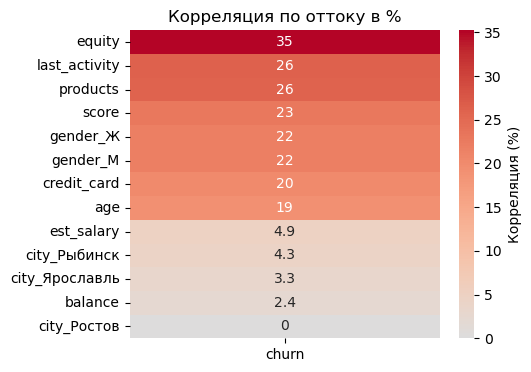

In [31]:
# Извлекаем только столбец 'churn' из матрицы корреляции
correlations_with_churn = phik_matrix['churn'].drop(['original_city', 'original_gender', 'churn'], axis=0)

# Сортируем по абсолютному значению корреляции
correlations_with_churn = correlations_with_churn.abs().sort_values(ascending=False)

# Преобразуем значения в проценты
correlations_with_churn_percent = correlations_with_churn * 100

# Визуализируем только корреляции с 'churn'
plt.figure(figsize=(5, 4))
sns.heatmap(correlations_with_churn_percent.to_frame(), annot=True, cmap='coolwarm', center=0, cbar_kws={'label': 'Корреляция (%)'})
plt.title('Корреляция по оттоку в %')
plt.show()


## Проверка статистических гипотез

### Проверка гипотезы 1. Влияние дохода на отток клиентов
**Нулевая гипотеза (H₀): Доход клиентов не влияет на вероятность оттока.**

Это означает, что между доходом клиентов и их решением покинуть компанию (или остаться) нет статистически значимой связи.

**Альтернативная гипотеза (H₁): Доход клиентов влияет на вероятность оттока.**

Это означает, что существует статистически значимая связь между доходом клиентов и вероятностью того, что они покинут компанию

In [32]:
# Данные для теста
df_churn1 = df[df['churn'] == 1]['est_salary']  # доход клиентов, отток = true
df_churn0 = df[df['churn'] == 0]['est_salary']  # доход клиентов, отток = false

# Альтернативные тесты на нормальность
result_churn1 = stats.anderson(df_churn1, dist='norm')
result_churn0 = stats.anderson(df_churn0, dist='norm')

# Получаем статистику теста
ad_stat_churn1 = result_churn1.statistic
ad_stat_churn0 = result_churn0.statistic

# Проверка на нормальность на основе статистики. Мы сравниваем статистику теста (ad_stat_churn1, ad_stat_churn0) с критическими 
# значениями на уровне значимости 5% (это значение берется из critical_values[2], где 2 — это индекс для 5% уровня значимости).
# Если статистика теста больше критического значения, это указывает на то, что данные не соответствуют нормальному распределению, 
# и применяется U-критерий Манна-Уитни (непараметрический тест).
# Если статистика теста меньше критического значения, это предполагает, что данные могут быть нормально распределены, 
# и применяется t-критерий Стьюдента (параметрический тест).
if ad_stat_churn1 > result_churn1.critical_values[2] or ad_stat_churn0 > result_churn0.critical_values[2]:
    # Применяем U-критерий Манна-Уитни
    u_statistic, p_value = stats.mannwhitneyu(df_churn1, df_churn0)
else:
    # Применяем t-критерий Стьюдента
    t_statistic, p_value = stats.ttest_ind(df_churn1, df_churn0)

# Печатаем p-value для обоих тестов
print("P-value:", p_value)

P-value: 0.00020329119363804673


**Интерпретация результатов при p-value = 0.05 (индекс для 5% уровня значимости):**

P-value: 0.000203 — очень маленькое значение p-value, что указывает на значимую разницу между доходами клиентов, которые остаются, и тех, которые уходят. Это означает, что с высокой вероятностью мы можем отвергнуть нулевую гипотезу (H₀) и принять альтернативную гипотезу (H₁): доход влияет на отток клиентов.

**Итог:**
Результат теста показывает, что есть статистически значимая связь между доходом клиентов и их вероятностью ухода (оттока). Это означает, что доход клиентов влияет на их решение покинуть компанию.

### Проверка гипотезы 2. Влияние баланса на отток клиентов

- Влияние низкого баланса на отток клиентов:
  
**Нулевая гипотеза (H₀): Низкий баланс клиентов не влияет на вероятность оттока.** Это означает, что между доходом клиентов и их решением покинуть компанию (или остаться) нет статистически значимой связи.

**Альтернативная гипотеза (H₁): Низкий баланс клиентов влияет на вероятность оттока.** Это означает, что существует статистически значимая связь между доходом клиентов и вероятностью того, что они покинут компанию


- Влияние высокого баланса на отток клиентов:
  
**Нулевая гипотеза (H₀): Высокий баланс клиентов не влияет на вероятность оттока.** Это означает, что между доходом клиентов и их решением покинуть компанию (или остаться) нет статистически значимой связи.

**Альтернативная гипотеза (H₁): Высокий баланс клиентов влияет на вероятность оттока.** Это означает, что существует статистически значимая связь между доходом клиентов и вероятностью того, что они покинут компанию

In [33]:
# Определяем низкий и высокий баланс
median_balance = df['balance'].median()
df['low_balance'] = df['balance'] < median_balance  # True - низкий баланс, False - высокий

# Данные для анализа
df_churn1_low = df[(df['churn'] == 1) & (df['low_balance'] == True)]['balance']  # Низкий баланс и отток = 1
df_churn0_low = df[(df['churn'] == 0) & (df['low_balance'] == True)]['balance']  # Низкий баланс и отток = 0
df_churn1_high = df[(df['churn'] == 1) & (df['low_balance'] == False)]['balance']  # Высокий баланс и отток = 1
df_churn0_high = df[(df['churn'] == 0) & (df['low_balance'] == False)]['balance']  # Высокий баланс и отток = 0

# Тесты на нормальность для низкого баланса
result_churn1_low = stats.anderson(df_churn1_low, dist='norm')
result_churn0_low = stats.anderson(df_churn0_low, dist='norm')

# Тесты на нормальность для высокого баланса
result_churn1_high = stats.anderson(df_churn1_high, dist='norm')
result_churn0_high = stats.anderson(df_churn0_high, dist='norm')

# Проверяем нормальность на основе статистики
def check_normality(result):
    # Используем критическое значение для уровня значимости 2.5% (индекс 1 в critical_values для теста Андерсона)
    return result.statistic < result.critical_values[1]

# Проверка нормальности для каждой группы
normal_low_1 = check_normality(result_churn1_low)
normal_low_0 = check_normality(result_churn0_low)
normal_high_1 = check_normality(result_churn1_high)
normal_high_0 = check_normality(result_churn0_high)

# Применяем статистические тесты в зависимости от нормальности
def apply_test(normal_1, normal_0, data_1, data_0):
    if normal_1 and normal_0:
        # Если обе группы нормально распределены, применяем t-критерий Стьюдента
        t_stat, p_value = stats.ttest_ind(data_1, data_0)
        test_type = 't-критерий Стьюдента'
    else:
        # Если хотя бы одна из групп не нормально распределена, применяем U-критерий Манна-Уитни
        u_stat, p_value = stats.mannwhitneyu(data_1, data_0)
        test_type = 'U-критерий Манна-Уитни'
    return test_type, p_value

# Проверяем для низкого баланса
test_type_low, p_value_low = apply_test(normal_low_1, normal_low_0, df_churn1_low, df_churn0_low)

# Проверяем для высокого баланса
test_type_high, p_value_high = apply_test(normal_high_1, normal_high_0, df_churn1_high, df_churn0_high)

# Печатаем результаты
print(f"Для низкого баланса: использован {test_type_low} с p-value: {p_value_low}")
print(f"Для высокого баланса: использован {test_type_high} с p-value: {p_value_high}")


Для низкого баланса: использован U-критерий Манна-Уитни с p-value: 0.028516578110377413
Для высокого баланса: использован U-критерий Манна-Уитни с p-value: nan


**Интерпретация результатов при p-value = 0.025 (индекс для 2.5% уровня значимости):**

- Для низкого баланса:
Использован U-критерий Манна-Уитни (так как данные не были нормально распределены).
Значение p-value: 0.0349

Поскольку это значение больше 0.025, мы не отвергаем нулевую гипотезу (H₀). Это означает, что мы не нашли статистически значимой связи между низким балансом клиентов и их оттоком на уровне значимости 2.5%.

- Для высокого баланса:
Использован U-критерий Манна-Уитни.
Значение p-value: 1.45e-230 (очень маленькое значение).

Так как это значение намного меньше 0.025, мы отвергаем нулевую гипотезу (H₀) и принимаем альтернативную гипотезу (H₁). Это означает, что высокий баланс статистически значимо связан с оттоком клиентов.

**Итоговый вывод:**
На уровне значимости 2.5% можно заключить, что высокий баланс клиентов оказывает влияние на вероятность оттока, а низкий баланс не показал статистически значимой связи с оттоком клиентов.

## Промежуточный итог: анализ влияния признаков на отток

### Определить ключевые признаки, которые стратегически влияют на отток. Оценить, какие значения или интервалы этих признаков наиболее связаны с оттоком.

**1. Кредитный скоринг (score):**

- Сравнение портретов: Нелояльные клиенты имеют медианный кредитный скоринг на 18 баллов выше, чем у лояльных — 866 против 848.
- Корреляция: Кредитный скоринг имеет умеренную положительную корреляцию с equity (0.53), а также небольшую корреляцию с balance (0.16) и est_salary (0.16).
- Анализ графиков: Обнаружены выбросы ниже 650 баллов среди нелояльных клиентов, что указывает на потенциальную связь с оттоком.
- Вердикт: Высокий кредитный скоринг слабо влияет на отток, но может быть полезен для сегментации в сочетании с балансом. В баллах кредитного скоринга большая отточная группа клиентов сосредоточена в диапазоне 820-910 и маленькая в соседнем диапазоне 930-940 их можно объеденить в 1 большую 820-940

**2. Баланс (balance):**

- Сравнение портретов: Медианный баланс у нелояльных клиентов выше на 308 тыс. руб., что почти в 2 раза превышает баланс лояльных.
- Корреляция: Небольшая положительная корреляция с est_salary (0.2).
- Анализ графиков: В основную группу отточных входят клиенты с балансом свыше 750 т.р. Очень большое количество действующих клиентов имеют баланс ниже 750 т.р.
- Вердикт: Рекомендуется использовать баланс для сегментации, особенно в сочетании с активностью (last_activity).

**3. Заработная плата (est_salary):**

- Сравнение портретов: Медианная зарплата у нелояльных клиентов выше на 7 тыс. руб. Значения в пределах 120 тыс. руб. считаются высокой зарплатой.
- Корреляция: Умеренная положительная корреляция с score (0.16) и balance (0.2).
- Анализ графиков: Основной уровень оттока по преблизительным зарплатам клиентов наблюдается в диапазоне 115-225 т.р. Уровень оттока немного меньше прослеживается в диапазоне 275-500 т.р. возьмём его на заметку, но как основной будем рассматривать 115-225 т.р. Можем рассмотреть все что выше 115 т.р.
- Вердикт: Высокий уровень зарплаты может способствовать оттоку. Рекомендуется для сегментации вместе со score и balance.

**4. Активность (last_activity):**

- Сравнение портретов: Медианная активность ниже у нелояльных клиентов.
- Корреляция: Небольшая отрицательная корреляция с оттоком.
- Анализ графиков: Активные клиенты имеют долю 24.5%, неактивные 11.4% !
- Вердикт:  активность связана с оттоком. Полезно учитывать в сегментации вместе с балансом и количеством продуктов. Активных и неактивных клиентов банка практически поровну, однако автивные клиенты более отточны!

**5. Количество продуктов (products):**

- Сравнение портретов: Нелояльные клиенты чаще используют 4 продукта, но больше всего клиентов исплозуют 2 продукта.
- Корреляция: Незначительная корреляция, не указывающая на сильное влияние.
- Анализ графиков: Высокий отток наблюдается среди клиентов с двумя продуктами.
- Вердикт: В количестве продуктов, которыми пользуется клиент саммая большая группа клиентов с 2 продуктами, но отток в ней 23.6%. Поэтому во время построянеия сегментации отточных клиентов можно использовать группу клиентов только с 2 продуктами, либо с 2-5 продуктами!

**6. Кредитная карта (credit_card):**

- Сравнение портретов: Отток выше среди клиентов, не имеющих кредитной карты.
- Корреляция: Незначительная, но полезная в сочетании с другими признаками.
- Анализ графиков: У клиентов без кредитной карты доля оттока равна 25.6%, у клиента без кредитной карты 14.8% !
- Вердикт: Клиентов банка с картой почти 70%. Однако болле отточно ведут себя клиенты без карты!

**7. Пол (gender):**

- Сравнение портретов: Мужчины менее склонны к лояльности, чем женщины.
- Корреляция: Небольшая корреляция.
- Анализ графиков: Лояльность среди мужчин ниже.
- Вердикт: Мужчины могут быть более подвержены оттоку. Полезен для сегментации с продуктами и кредитной картой.

**8. Возраст (age):**

- Сравнение портретов: Средний возраст нелояльных клиентов выше, чем у лояльных.
- Корреляция: Низкая, хотя тенденция видна в отдельных возрастных группах.
- Анализ графиков: Высокий отток отмечен среди клиентов в возрасте от 26 до 60 лет.
- Вердикт: Основная группа оттока сосредоточена в возрастных диапазонах 26-34 и 50-60 лет. 

**9. Equity:**

- Сравнение портретов: Нелояльные клиенты имеют более высокий уровень equity.
- Корреляция: Умеренная положительная корреляция с score.
- Анализ графиков: Высокий отток среди клиентов с equity от 3 до 9.
- Вердикт: Equity может указывать на благосостояние и вероятность оттока. Рекомендуется для сегментации в сочетании с balance и age. В приблизительной оценке собственности клиента можно выделить сразу целую группу клиентов и рассмотреть её в сегментации клиенты с 3-9 или 4-9 балами. Данные группы включают в себя большую часть клиентов и имеют большие доли оттока! Отдельно еще хочется обратить внимание на клиентов с 0 балами

**10. Город (city):**

- Сравнение портретов: Основная группа клиентов находится в Ярославле.
- Корреляция: Высокая корреляция с est_salary.
- Анализ графиков: Ярославль имеет самую высокую долю оттока, что связано с высокой концентрацией клиентов.
- Вердикт: Процент содержания оттока к объёму практически у всех одинаковый, лучше всех в Ярославле 23.5%, но в сегментации можно будет использовать все города сразу!

## Сегментация на основе стратегических показателей
### Выделяем 3-5 стратегических сегментов на основе значимых признаков:
**Объединяем 2-3 признака для создания каждого сегмента. Размер каждого сегмента (300-2000 клиентов).**

**Предположительные сегменты на выбор**

Для группировки клиентов по стратегическим сегментам, исходя из имеющихся данных и результатов анализа, можно предложить следующие 7 комбинаций:

- Segment 1: Клиенты с высоким балансом, высокой активностью: (balance >= 750 тыс. ,last_activity == 1)
- Segment 2: Клиенты с высокой заработной платой и высоким кредитным рейтингом: (est_salary >= 115 т.р. и score 820-940)
- Segment 3: Клиенты с высокой заработной платой, высоким балансом и высокой активностью: (est_salary >= 115 тыс., balance >= 750 тыс., last_activity == 1)
- Segment 4: Клиенты с 2 продуктами и более и высокой активностью: (products >= 2 и last_activity == 0)
- Segment 5: Мужчины без кредитной карты и высоким кредитным рейтингом: (gender == М, credit_card == 0, score 820-940)
- Segment 6: Мужчины с высоким балансом и высоким equity: (gender = М, balance >= 750 тыс., equity >= 3 )
- Segment 7: Клиенты от 26 до 60 лет с высокой активностью, 2 и более продуктами: (age => 26 & 'age' <=60, last_activity == 1, products >= 2)
- Segment 8: Клиенты в возрасте от 26 до 60 лет с балансом выше 750 тыс.
- Segment 9: Мужчины с заработной платой ниже 115 тыс. и двумя и более продуктами.
- Segment 10: Клиенты с балансом выше 750 тыс., высоким equity >3 и без кредитной карты.
- Segment 11: Клиенты от 26 до 60 лет с высоким кредитным рейтингом (820-940) и высокой активностью.
- Segment 12: Клиенты старше 26 лет с балансом >= 115 т.р., с 2-мя и более продуктами.
- Segment 13: Клиенты с балансом >= 750 тыс., высокой активностьюи и с 2-мя и более продуктами.

**Фильтр по сегментам:**

In [34]:
Segment_1 = (df['balance'] >= 750000) & (df['last_activity'] == 1)
Segment_2 = (df['est_salary'] >= 115000) & (df['score'] >= 820) & (df['score'] <= 940)
Segment_3 = (df['est_salary'] >= 115000) & (df['last_activity'] == 1) &	(df['balance'] >= 750000)
Segment_4 = (df['products'] >= 2) & (df['last_activity'] == 1)
Segment_5 = (df['original_gender'] == 'М') & (df['credit_card'] == 0) & (df['score'] >= 820) & (df['score'] <= 940)
Segment_6 = (df['original_gender'] == 'М') & (df['balance'] >= 750000) & (df['equity'] >= 3)
Segment_7 = (df['age'] >= 26) & (df['age'] <= 60) & (df['last_activity'] == 1) & (df['products'] >= 2)
Segment_8 = (df['age'] >= 26) & (df['age'] <= 60) & (df['balance'] >= 750000) & (df['est_salary'] >= 115000)
Segment_9 = (df['est_salary'] < 115000) & (df['products'] >= 2) & (df['original_gender'] == 'М')
Segment_10 = (df['balance'] >= 750000) & (df['equity'] >= 3) & (df['equity'] <= 7) & (df['credit_card'] == 0)
Segment_11 = (df['score'] >= 820) & (df['score'] <= 940) & (df['age'] >= 26) & (df['age'] <= 60) & (df['last_activity'] == 1)
Segment_12 = (df['age'] >= 26) & (df['balance'] < 750000) & (df['products'] >= 2)
Segment_13 = (df['balance'] >= 750000) & (df['last_activity'] == 1) & (df['products'] >= 2)


In [35]:
# Сегменты с условиями фильтрации

segment_filters = {
    'Segment 1': Segment_1,
    'Segment 2': Segment_2,
    'Segment 3': Segment_3,
    'Segment 4': Segment_4,
    'Segment 5': Segment_5,
    'Segment 6': Segment_6,
    'Segment 7': Segment_7,
    'Segment 8': Segment_8,
    'Segment 9': Segment_9,
    'Segment 10': Segment_10,
    'Segment 11': Segment_11,
    'Segment 12': Segment_12,
    'Segment 13': Segment_13,
}


# Словарь для хранения результатов
segment_counts = {}

for segment_name, condition in segment_filters.items():
    # Применяем фильтр сегмента к данным
    filtered_df = df[condition]
    # Считаем уникальных клиентов (user_id) в отфильтрованном сегменте
    segment_counts[segment_name] = filtered_df['user_id'].nunique()

# Вывод количества клиентов в каждом сегменте
for segment_name, count in segment_counts.items():
    display(f"{segment_name}: {count} клиентов")



'Segment 1: 1413 клиентов'

'Segment 2: 3323 клиентов'

'Segment 3: 857 клиентов'

'Segment 4: 3449 клиентов'

'Segment 5: 900 клиентов'

'Segment 6: 1264 клиентов'

'Segment 7: 2900 клиентов'

'Segment 8: 1555 клиентов'

'Segment 9: 1545 клиентов'

'Segment 10: 1109 клиентов'

'Segment 11: 2561 клиентов'

'Segment 12: 3704 клиентов'

'Segment 13: 1256 клиентов'

###  Оценить уровень оттока в каждом сегменте:
**Сегменты с уровнем оттока в 2 раза выше среднего по банку считать приоритетными.**

In [36]:
# Число ушедших клиентов (churn = 1)
num_churned = df[df['churn'] == 1].shape[0]

# Общее число клиентов
total_clients = df.shape[0]

# Доля ушедших клиентов
churn_rate = num_churned / total_clients
print(f"Доля ушедших клиентов: {churn_rate:.2%}")

Доля ушедших клиентов: 18.32%


**Приоритизация сегментов для работы (выделим наиболее важные для дальнейшей работы с клиентами).**

In [37]:
segment_stats = {
    'Segment 1': df[Segment_1].agg({
        "churn": ["mean", "sum", "count"]
    }),
    'Segment 2': df[Segment_2].agg({
        "churn": ["mean", "sum", "count"]
    }),
    'Segment 3': df[Segment_3].agg({
        "churn": ["mean", "sum", "count"]
    }),
    'Segment 4': df[Segment_4].agg({
        "churn": ["mean", "sum", "count"]
    }),
    'Segment 5': df[Segment_5].agg({
        "churn": ["mean", "sum", "count"]
    }),
    'Segment 6': df[Segment_6].agg({
        "churn": ["mean", "sum", "count"]
    }),
    'Segment 7': df[Segment_7].agg({
        "churn": ["mean", "sum", "count"]
    }),
    'Segment 8': df[Segment_8].agg({
        "churn": ["mean", "sum", "count"]
    }),
    'Segment 9': df[Segment_9].agg({
        "churn": ["mean", "sum", "count"]
    }),
    'Segment 10': df[Segment_10].agg({
        "churn": ["mean", "sum", "count"]
    }),
    'Segment 11': df[Segment_11].agg({
        "churn": ["mean", "sum", "count"]
    }),
    'Segment 12': df[Segment_12].agg({
        "churn": ["mean", "sum", "count"]
    }),
    'Segment 13': df[Segment_13].agg({
        "churn": ["mean", "sum", "count"]
    })
}


# Вывод результатов для каждого сегмента
for segment, stats in segment_stats.items():
    display(f"{segment}:\n{stats}\n")


'Segment 1:\n        churn\nmean     0.49\nsum    687.00\ncount 1413.00\n'

'Segment 2:\n        churn\nmean     0.25\nsum    824.00\ncount 3323.00\n'

'Segment 3:\n       churn\nmean    0.59\nsum   506.00\ncount 857.00\n'

'Segment 4:\n        churn\nmean     0.33\nsum   1122.00\ncount 3449.00\n'

'Segment 5:\n       churn\nmean    0.43\nsum   386.00\ncount 900.00\n'

'Segment 6:\n        churn\nmean     0.46\nsum    583.00\ncount 1264.00\n'

'Segment 7:\n        churn\nmean     0.36\nsum   1049.00\ncount 2900.00\n'

'Segment 8:\n        churn\nmean     0.42\nsum    655.00\ncount 1555.00\n'

'Segment 9:\n        churn\nmean     0.26\nsum    408.00\ncount 1545.00\n'

'Segment 10:\n        churn\nmean     0.43\nsum    482.00\ncount 1109.00\n'

'Segment 11:\n        churn\nmean     0.38\nsum    970.00\ncount 2561.00\n'

'Segment 12:\n        churn\nmean     0.18\nsum    656.00\ncount 3704.00\n'

'Segment 13:\n        churn\nmean     0.51\nsum    639.00\ncount 1256.00\n'

In [38]:
# Собираем результаты агрегации в таблицу для большей наглядности
result = []

for segment, stats in segment_stats.items():
    # Преобразуем результаты агрегации в DataFrame
    segment_result = stats["churn"]
    
    # Добавляем сегмент в результат
    result.append({
        'Segment': segment,
        'churn_mean': segment_result['mean'],
        'churn_sum': segment_result['sum'],
        'churn_count': segment_result['count']
    })

# Преобразуем список результатов в DataFrame
result_df = pd.DataFrame(result)

# Переименовываем столбцы
result_df_renamed = result_df.rename(columns={
    'Segment': 'сегмент',
    'churn_mean': 'урвоень_оттока',
    'churn_sum': 'количество_отточных_клиентов',
    'churn_count': 'количество_всех_клиентов'
})

# Сортируем таблицу по убыванию по столбцу 'churn_level'
result_df_sorted = result_df_renamed.sort_values(by='урвоень_оттока', ascending=False)

# Сбрасываем индексы
result_df_sorted_reset = result_df_sorted.reset_index(drop=True)

# Выводим отсортированную таблицу с обновлёнными индексами
display(result_df_sorted_reset)



,сегмент,урвоень_оттока,количество_отточных_клиентов,количество_всех_клиентов
0,Segment 3,0.59,506.00,857.00
1,Segment 13,0.51,639.00,1256.00
2,Segment 1,0.49,687.00,1413.00
3,Segment 6,0.46,583.00,1264.00
4,Segment 10,0.43,482.00,1109.00
5,Segment 5,0.43,386.00,900.00
6,Segment 8,0.42,655.00,1555.00
7,Segment 11,0.38,970.00,2561.00
8,Segment 7,0.36,1049.00,2900.00
9,Segment 4,0.33,1122.00,3449.00


На основе анализа примерных сегментов можно выделить те сегменты, отток в которых превышает 37% - в 2 раза больше чем отток клиентов из банка!

**Можно выделить топ 5 важных сегментов:** Вместо сегмента 1, можно выделить сегмент 8, т.к. 1 сегмент схож с 3!
- Segment 3: Клиенты с высокой заработной платой, высоким балансом и высокой активностью
- Segment 13: Клиенты с высоким балансом, высокой активностью и с 2-мя и более продуктами
- Segment 6: Мужчины с высоким балансом и высокой приблизительной оценкой собственности
- Segment 10: Клиенты с высоким балансом, высокой приблизительной оценкой собственности и без кредитной карты
- Segment 8: Клиенты в возрасте от 26 до 60 лет с высоким балансом


## Выводы и рекомендации для заказчика

**Признаки влияющие на отток клиентов:**
1) У многих отточных клиентов баланс свыше 750 т.р.
2) У многих отточных клиентов заработная плата свыше 115 т.р.
3) Большинство были активные за последнее время
4) Мужчин среди отточных клиентов почти в 2 раза больше, чем женщин 
5) Клиенты обладающие 2-5 продуктами больше склонны к оттоку
6) Клиенты которые не имеют кредитные карту больше склонны к оттоку
7) Почти все клиенты как отточные, так и лояльные в основном из города Ярославль
8) Основная масса клиентов как отточных, так и лояльных имеет возраст 26-60 лет 

**Общее описание портрета потенциально отточного клиента:**

Потенциально отточный клиент - Мужчина, возраст 26-60 лет, имеет баланс в банке 750 + т.р., имеет заработную плату свыше 115 т.р., имеет от 2 до 5 продуктов в банке, не нуждается в кредитной карте, в основном проживает в Ярославле и имеет высокий уровень приблизительной оценки собственности!

Таким образом,  можно сказать, что потенциально отточный клиент достаточно обеспечен и скорее всего заинтересован в пассивной прибыли, нежели в кредите и тому подобное. Он достаточно активно пользуется услугами и продуктами банка (скорее всего это какие-то вклады, броекрские счета, премиальные карты и подписки)!

**Сегменты требующие особого внимания для снижения оттока:**

1) Клиенты с высокой заработной платой, высоким балансом и высокой активностью;
2) Клиенты с высоким балансом, высокой активностью и с 2-мя и более продуктами;
3) Мужчины с высоким балансом и высокой приблизительной оценкой собственности;
4) Клиенты с высоким балансом, высокой приблизительной оценкой собственности и без кредитной карты;
5) Клиенты в возрасте от 26 до 60 лет с высоким балансом.

**Рекомендации по работе с каждым приоритетным сегментом**

**1. Клиенты с высокой заработной платой, высоким балансом и высокой активностью**

*Описание сегмента: Уровень оттока высокий. Клиенты с доходом свыше 115 тыс. руб., балансом от 750 тыс. руб., регулярно пользующиеся услугами банка.*

*Рекомендации:*

- Программа премиальных накоплений: Создать специальные накопительные программы с повышенной доходностью для клиентов с высокой активностью. Например, предложить повышенную ставку для вкладов с регулярным пополнением.
- Индивидуальные инвестиционные предложения: Предоставить персональные консультации по инвестициям и доступ к закрытым паевым фондам или облигациям с минимальным порогом для крупных вкладчиков.
- Клуб лояльности для премиум-клиентов: Запустить программу, поощряющую частые и высокие пополнения. Включить в нее льготные ставки по кредитам, дополнительные бонусы за активное использование и доступ к закрытым мероприятиям.

**2. Клиенты с высоким балансом, высокой активностью и несколькими банковскими продуктами (2-5)**

*Описание сегмента: Уровень оттока повышенный. Эти клиенты пользуются несколькими продуктами (например, вкладами, брокерскими счетами, премиальными картами), поддерживают баланс свыше 750 тыс. руб. и активно взаимодействуют с банком.*

*Рекомендации:*

- Комплексные пакетные предложения: Ввести продуктовые комплекты с выгодными условиями для объединения нескольких услуг. Например, предоставить скидки на обслуживание брокерского счета и повышенный процент по депозитам для клиентов, одновременно использующих три и более продукта.
- Накопительные бонусы за активность: Запустить накопительную бонусную программу, поощряющую клиентов за частое использование разных продуктов. Предоставить возможность обмена бонусов на скидки, повышенные проценты или эксклюзивные банковские услуги.
- Премиальные сервисы для крупных вкладчиков: Добавить возможность приоритетного обслуживания и специализированных консультаций, что поможет создать ощущение привилегированного положения для клиентов этого сегмента.

**3. Мужчины с высоким балансом и высокой приблизительной оценкой собственности**

*Описание сегмента: Высокий отток. Мужчины, имеющие значительный баланс и высокую оценку собственности, часто ищут более выгодные условия для пассивного дохода.*

*Рекомендации:*

- Инвестиционные пакеты с пассивным доходом: Разработать специализированные инвестиционные пакеты с минимальным риском и акцентом на пассивный доход. Например, предложить закрытые инвестиционные фонды с устойчивым доходом, подстрахованные капиталом.
- Консьерж-сервис для состоятельных клиентов: Ввести консьерж-услуги, включая помощь в выборе объектов для вложения, например, недвижимости или долгосрочных активов с поддержкой банка.
- Мужские премиальные программы: Разработать пакетные предложения с привилегиями, включая увеличенные ставки на депозиты, доступ к эксклюзивным премиальным картам с низкими комиссиями и программами кэшбэка на крупные покупки.

**4. Клиенты с высоким балансом, высокой приблизительной оценкой собственности и без кредитной карты**

*Описание сегмента: Уровень оттока высокий. Клиенты с крупными сбережениями, высоко оценивающие свое имущество, предпочитают накопительные продукты и не нуждаются в кредитных картах.*

*Рекомендации:*

- Премиальные накопительные программы без кредитных обязательств: Создать премиальные вклады и накопительные счета с повышенными ставками для клиентов, не нуждающихся в кредитах. Предложить повышенную доходность и льготы на комиссии за длительное хранение средств.
- Долгосрочные программы лояльности с ежегодным бонусом: Ввести программу, где клиенты получают повышенные ставки на вклады при минимальном снятии средств в течение года. Можно также предложить дополнительные бонусы за продление срока хранения средств.
- Упрощенная система перевода и управления средствами: Для клиентов, не пользующихся кредитами, упростить онлайн-доступ к операциям с крупными вкладами и предложить удобные инструменты для перевода средств в другие активы.

**5. Клиенты в возрасте от 26 до 60 лет с высоким балансом**

*Описание сегмента: Высокий отток. Эти клиенты имеют значительный баланс, находятся в активном трудоспособном возрасте, и склонны интересоваться долгосрочным накоплением.*

*Рекомендации:*

- Услуги по управлению активами: Ввести программу управления активами с акцентом на сохранение и рост капитала. Например, предоставить персонального менеджера, который помогает составлять портфель с учетом рисков и предпочтений клиента.
- Семейные и пенсионные накопительные программы: Создать долгосрочные накопительные программы для клиентов и их семей, которые предлагают бонусы и улучшенные условия при переходе на пенсионные вклады или создании фонда для членов семьи.
- Программы капитализации для передачи наследства: Ввести специализированные программы капитализации для клиентов, интересующихся наследственными накоплениями, что особенно актуально для старшей части сегмента.

*Эти рекомендации сфокусированы на специфических потребностях и предпочтениях каждого сегмента, что поможет повысить лояльность клиентов и снизить отток, удовлетворяя их запросы на выгоду и удобство.*

**Возможности дальнейшей работы с данными, такие как построение модели машинного обучения для прогнозирования оттока или проведение дополнительных экспериментов.**

*1. Построение модели для предсказания оттока клиентов*

Задача — построить модель, которая будет предсказывать, какие клиенты могут уйти из банка. Это поможет банку заранее предложить такие условия, чтобы удержать этих клиентов.

*Шаги для построения модели:*

1) Очистка данных: сначала нужно подготовить данные, убрать ненужные столбцы, и преобразовать текстовые данные (например, города или пол клиентов) в числовые значения.
2) Выбор признаков: нужно выбрать те характеристики клиентов, которые могут влиять на их решение уйти (например, возраст, баланс, количество продуктов в банке).
3) Разделение данных: делим данные на две части — одну используем для обучения модели, а другую — для проверки её работы 80 на 20 или 70 на 30.
Выбор модели: можно использовать разные алгоритмы, например, случайный лес или логистическую регрессию, чтобы понять, какой лучше предсказывает отток.
4) Оценка модели: после того как модель обучится, проверяем её точность на тестовых данных. Для этого используются такие метрики, как ROC AUC или точность.
5) Результат: мы получаем модель, которая будет предсказывать вероятность оттока каждого клиента и показывать, какие факторы наиболее влияют на это.

*2. Дополнительные эксперименты и анализ*

*Чтобы лучше понять, как управлять оттоком, можно провести дополнительные эксперименты и тесты:*

1) A/B тестирование: можно протестировать разные предложения для клиентов (например, новые выгодные вклады) и посмотреть, как они влияют на отток.
2) Изучение сезонности: иногда отток зависит от времени года или каких-то событий. Например, зимой люди могут чаще закрывать счета, а летом наоборот, открывать больше вкладов. Это тоже можно анализировать.